In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import torch
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [193]:
from src.data_loader import ViTDataLoader
from src.vit_train import ViTTrainer, load_model_dir, load_model_config
import importlib
from src.vit_data import load_cd_data

config = importlib.import_module(f"config.complex")
vit = load_model_config(config)
vit_data = load_cd_data()

dataloader = ViTDataLoader(vit_data, split_type=config.SPLIT_TYPE, split_arg=config.SPLIT_ARG)
print(dataloader.split_repr())

trainer = ViTTrainer(vit, dataloader)


Split: chrom,4; Training: 20752; Validation: 2306; Testing: 3504


In [194]:
device = trainer.device
vit = trainer.vit

In [195]:
trainer.setup()

Creating directory: output/complex_20220525_69c6...


In [227]:
vit.load_state_dict(torch.load('output/complex_20220524_1f9e/model.torch', map_location=torch.device('cpu')))

<All keys matched successfully>

In [234]:
# trainer.train()

In [ ]:
trainer.loss_df

In [228]:
trainer.compute_predictions_losses()

In [229]:
print(trainer.perf_str)

Loss:
  Train:	0.187
  Valid:	0.190
  Test: 	1.031

R2:
  Train:	0.814
  Valid:	0.817
  Test: 	-0.167


(-5.0, 5.0)

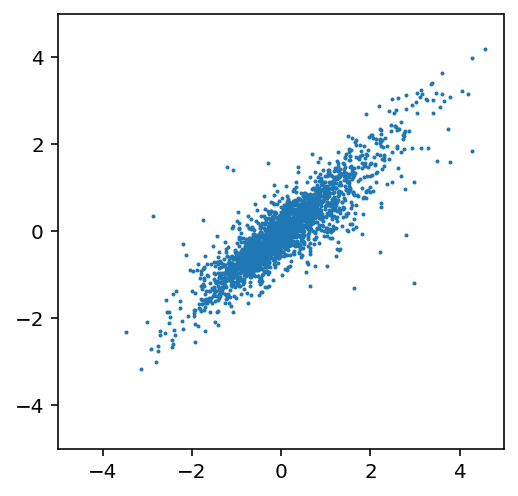

In [203]:
plt.figure(figsize=(4,4))
plt.scatter(trainer.validation_tx, trainer.validation_predictions, s=1)
plt.xlim(-5, 5)
plt.ylim(-5, 5)

In [217]:
trainloader = dataloader.trainloader
running_loss = 0.0

# Enumerate trainloader batches
is_perturb = False
for i, data in enumerate(trainloader, 0):

    images, tx, _, _, _ = data

    # zero the parameter gradients
    trainer.optimizer.zero_grad()

    # forward + backward + optimize
    outputs, weights = vit(images.float().to(device))
    loss = trainer.criterion(outputs.double(), tx.reshape(outputs.shape).to(device))
    loss_val = loss.item()
    
    loss.backward()
    trainer.optimizer.step()

    running_loss += loss_val

train_loss = (running_loss / len(trainloader))
train_loss

0.1283994417455355

In [215]:
trainloader = dataloader.trainloader
running_loss = 0.0

# Enumerate trainloader batches
is_perturb = False
for i, data in enumerate(trainloader, 0):

    images, tx, _, _, _ = data

    # zero the parameter gradients
    trainer.optimizer.zero_grad()

    # forward + backward + optimize
    outputs, weights = vit(images.float().to(device))
    loss = trainer.criterion(outputs.double(), tx.reshape(outputs.shape).to(device))

    trainer.optimizer.step()

    running_loss += loss.item()

train_loss = (running_loss / len(trainloader))
train_loss

0.22477621520537136

In [225]:
trainer.compute_validation_loss(dataloader.validationloader)

0.24705932650353343

In [218]:
trainer.compute_predictions_losses()

In [223]:
print(trainer.perf_str)

Loss:
  Train:	0.224
  Valid:	0.249
  Test: 	1.044

R2:
  Train:	0.779
  Valid:	0.761
  Test: 	-0.182
